In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import ipywidgets as widgets
from IPython.display import display
import os
import yaml
from yaml.loader import SafeLoader

In [2]:
# Load path from current dir
with open("../configs/paths/default.yaml") as f:
    cfg = yaml.load(f, Loader=SafeLoader)
    path = cfg["current_dir"]
    path = path.replace("${paths.root_dir}", "..")
    path += "/"

# Input of the script (we only get the mu)
all_anim = torch.cat((torch.load(path + "x_train.pt"), torch.load(path + "x_test.pt")))

latent_representation_all = all_anim.numpy()

# Compute PCA space
projector = PCA(n_components=2).fit(latent_representation_all)


FileNotFoundError: [Errno 2] No such file or directory: '../logs/train/multiruns/2023-07-11_17-15-53/1/checkpoints/x_train.pt'

In [ ]:
x_train = torch.load(path + "x_train.pt")
xhat_train = torch.load(path + "xhat_train.pt")
xdeter_train = torch.load(path + "xdeter_train.pt")
x_test = torch.load(path + "x_test.pt")
xhat_test = torch.load(path + "xhat_test.pt")
xdeter_test = torch.load(path + "xdeter_test.pt")

data = [[x_train, xdeter_train], [x_test, xdeter_test]]

In [ ]:
def visualize_latent_structure(test, n_seconds = range(60)):
    latent_representation_original = data[test][0][range(n_seconds[0]*30,n_seconds[1]*30)].numpy()
    latent_representation_reconstructed = data[test][1][range(n_seconds[0]*30,n_seconds[1]*30)].numpy()

    latent_representation_2d_original = projector.transform(latent_representation_original)
    latent_representation_2d_reconstructed = projector.transform(latent_representation_reconstructed)

    plt.figure(figsize=(10, 5)) 

    
    cmap_original = plt.get_cmap('Blues')
    colors_original = [cmap_original(i / len(latent_representation_original)) for i in range(len(latent_representation_original))]
    plt.scatter(latent_representation_original[:, 0], latent_representation_original[:, 1], c=colors_original)

    cmap_reconstructed = plt.get_cmap('Reds')
    colors_reconstructed = [cmap_reconstructed(i / len(latent_representation_reconstructed)) for i in range(len(latent_representation_reconstructed))]
    plt.scatter(latent_representation_reconstructed[:, 0], latent_representation_reconstructed[:, 1], c=colors_reconstructed)

    plt.title('VAE Distribution Visualization')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    #plt.xlim([-7, 7])
    #plt.ylim([-7, 7])
    plt.show()


In [ ]:
projector.components_

array([[-1.34145608e-03, -7.05513835e-01,  4.43250462e-02,
         5.76216914e-03,  1.30900065e-03,  4.90913633e-04,
        -6.34561898e-03,  1.73829598e-04,  2.21315236e-03,
         7.26779399e-04,  2.28370802e-04, -7.28529645e-04,
         4.22179430e-10, -2.81009827e-10,  4.14555223e-10,
         8.74874939e-04,  1.94736489e-03, -4.95025655e-04,
        -8.09382834e-03,  7.52837746e-04,  1.53883267e-03,
         1.76153821e-03,  5.04773576e-04, -6.83591992e-04,
        -5.60507640e-10,  4.47017034e-10, -3.70122072e-10,
        -6.36164856e-04, -3.76122945e-04,  1.17234973e-04,
        -1.26508786e-03, -7.75183900e-04,  1.96131179e-04,
        -1.26350252e-03, -8.20538320e-04,  1.45461920e-04,
         1.92950014e-03, -1.07925525e-03, -2.61387613e-04,
        -6.29645947e-04, -1.31882040e-03,  6.61736922e-05,
         1.13543669e-04,  5.90656360e-04,  6.26940106e-04,
         5.12586068e-03, -4.38438915e-03, -5.31847647e-04,
         4.41558339e-04,  3.86784086e-03, -1.10326731e-0

In [ ]:
time_slider = widgets.IntSlider(min=1, max=1000, step=1, value=5, description='seconds:')
time_slider = widgets.SelectionRangeSlider(
    options=range(1001),
    index=(0,1000),
    description='seconds',
    disabled=False
)

train_test_slider = widgets.IntSlider(min=0, max=1, step=1, value=0, description='is test:')
#orginal_reconstructed_slider = widgets.IntSlider(min=0, max=1, step=1, value=0, description='is reconstructed:')

widgets.interact(visualize_latent_structure, n_seconds = time_slider, test = train_test_slider)

interactive(children=(IntSlider(value=0, description='is test:', max=1), SelectionRangeSlider(description='sec…

<function __main__.visualize_latent_structure(test, n_seconds=range(0, 60))>

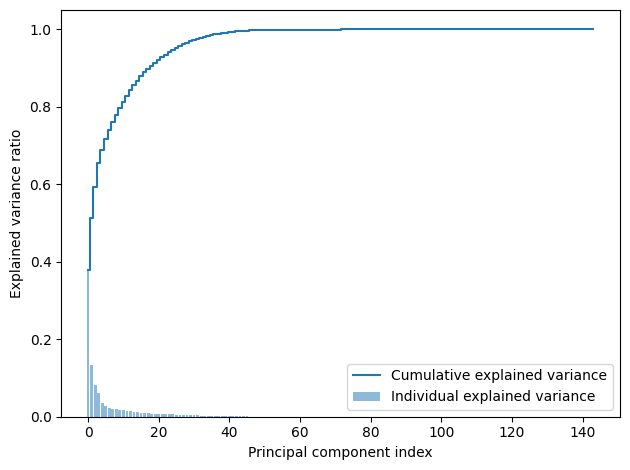

In [ ]:

# Compute PCA space for large number of components
pca_vis = PCA().fit(latent_representation_all)
exp_var_pca = pca_vis.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
n_necessary = [np.where(cum_sum_eigenvalues > i*0.1)[0][0] for i in range(5,10)]

In [9]:
n_necessary

NameError: name 'n_necessary' is not defined

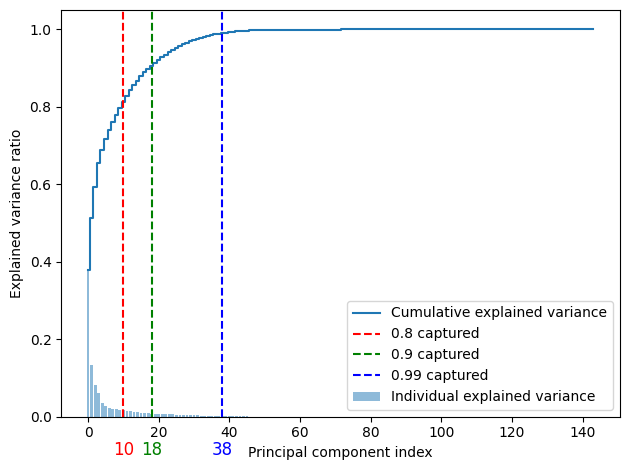

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Compute PCA space for large number of components
pca_vis = PCA().fit(latent_representation_all)
exp_var_pca = pca_vis.explained_variance_ratio_

# Cumulative sum of eigenvalues
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Find indices when 0.8, 0.9 and 0.99 of the variance is captured
idx_80 = np.where(cum_sum_eigenvalues >= 0.8)[0][0]
idx_90 = np.where(cum_sum_eigenvalues >= 0.9)[0][0]
idx_99 = np.where(cum_sum_eigenvalues >= 0.99)[0][0]

# Create the visualization plot
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')

# Add markers for 0.8, 0.9, and 0.99 of the variance captured
plt.axvline(x=idx_80, color='red', linestyle='--', label='0.8 captured')
plt.axvline(x=idx_90, color='green', linestyle='--', label='0.9 captured')
plt.axvline(x=idx_99, color='blue', linestyle='--', label='0.99 captured')

# Annotate indices for 0.8, 0.9, and 0.99 of the variance captured

plt.annotate(f'{idx_80}', (idx_80, exp_var_pca[idx_80]), xytext=(idx_80, -0.1), ha='center', fontsize=12, color='red')
plt.annotate(f'{idx_90}', (idx_80, exp_var_pca[idx_90]), xytext=(idx_90, -0.1), ha='center', fontsize=12, color='green')
plt.annotate(f'{idx_99}', (idx_99, exp_var_pca[idx_99]), xytext=(idx_99, -0.1), ha='center', fontsize=12, color='blue')

plt.legend(loc='best')
plt.tight_layout()
plt.show()
